<h1>MP6</h1>
<h4> Submitted by: 
    <br>
    Aditya Kumar
    <br>
     NETID: AKE9173</h4>

In [4]:
import numpy as np
from math import sin, cos, pi, hypot, radians
import cv2
import matplotlib.pyplot as plt

In [5]:
def find_accumulator(image, image_name, rho, t):
    rows, cols = image.shape
    accum_w = int(hypot(rows,cols)/rho)
    accum_h = int(180./rho)
    accum = np.array([[0]*accum_w]*accum_h) 
    for r in range(rows):
        for c in range(cols):
            if image[r][c]>0:
                for bin_theta in range(accum_h):
                    theta = radians(bin_theta*t)
                    rh = (c-cols/2)*cos(theta) + (r-rows/2)*sin(theta)
                    bin_rho = accum_w//2 + int(rh/rho)
                    accum[bin_theta][bin_rho] += 1
                    
    cv2.imwrite('accumulator_'+image_name, accum*5)
    accum = np.true_divide(accum, accum.sum())
    return accum, accum_w

In [6]:
def find_intersections(accum, thresh):
    accum_i = np.argwhere(accum>thresh)
    accum_p = accum_i[0]
    accum_n = [accum_p]
    for i in range(1, accum_i.shape[0]):
        if np.any(abs(accum_i[i] - accum_p)>5):
            accum_n.append(accum_i[i])
        accum_p = accum_i[i]
    accum_n = np.asarray(accum_n)
    return accum_n

In [34]:
def hough_transform(img_in, theta=1, rho=1, thresh=0.000253):
    image = cv2.imread(img_in, 1)
    img = image.copy()
    img_canny = cv2.Canny(img,100,200)
    rows, cols = img_canny.shape
    
    accum, accum_w = find_accumulator(img_canny, img_in, rho, theta)
    accum_new = find_intersections(accum, thresh)

    for r in range(rows):
        for c in range(cols):
            for m,n in accum_new:
                if round((n-accum_w/2)*rho) == round((c-cols/2)*cos(radians(m*theta)) + (r-rows/2)*sin(radians(m*theta))):
                    img[r][c] = 255
                    
    cv2.imwrite('hough_transformed_'+img_in, img)
    plt.figure(figsize = (30,20))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.imshow(img_canny, cmap='gray')
    plt.subplot(133)
    plt.imshow(img, cmap='gray') 
    plt.show()

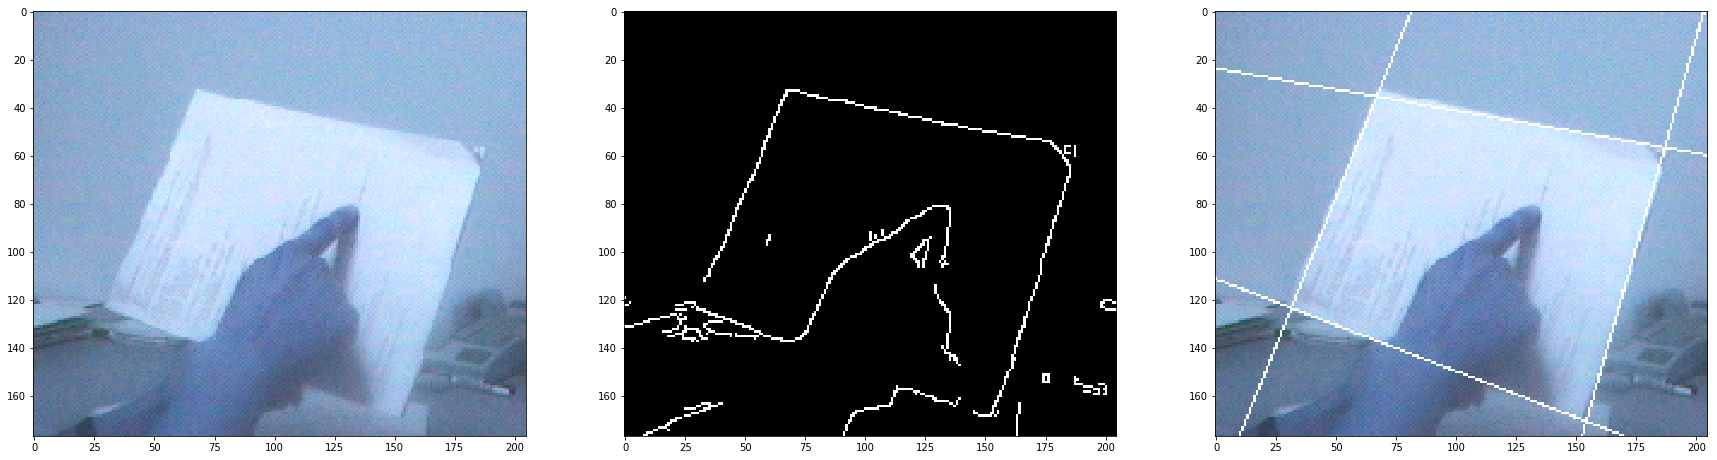

In [35]:
hough_transform('input.bmp')

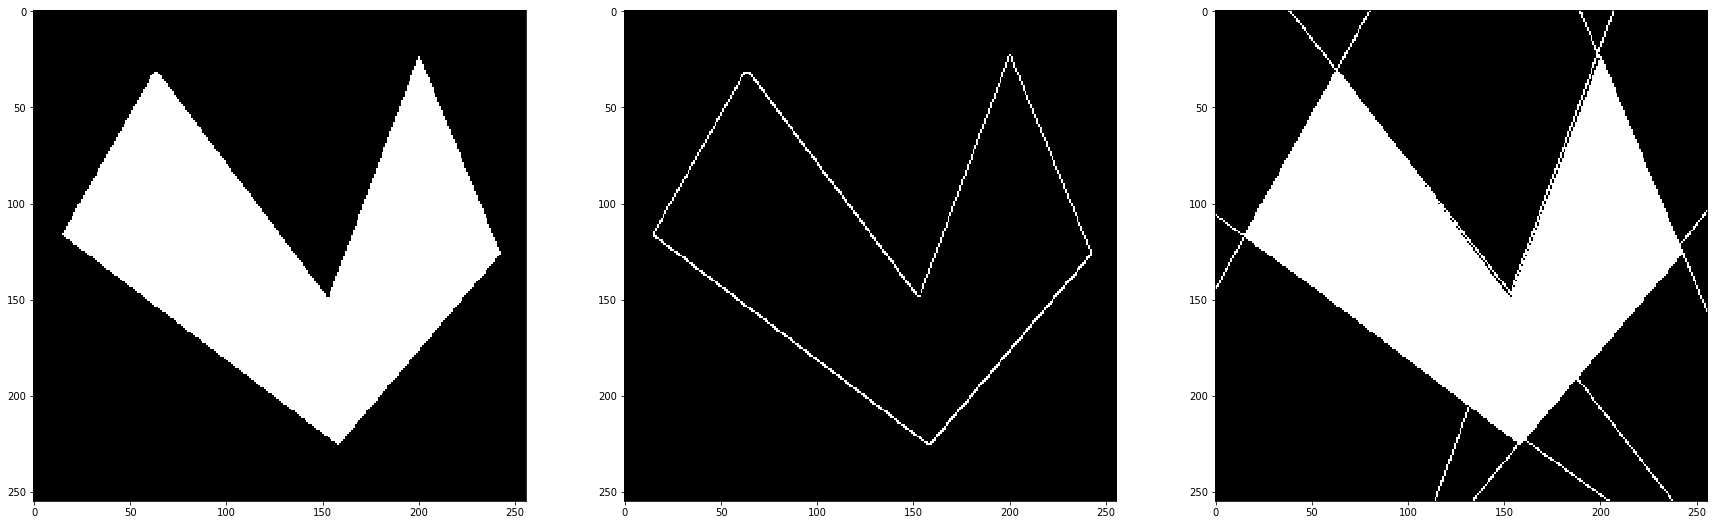

In [12]:
hough_transform('test2.bmp')

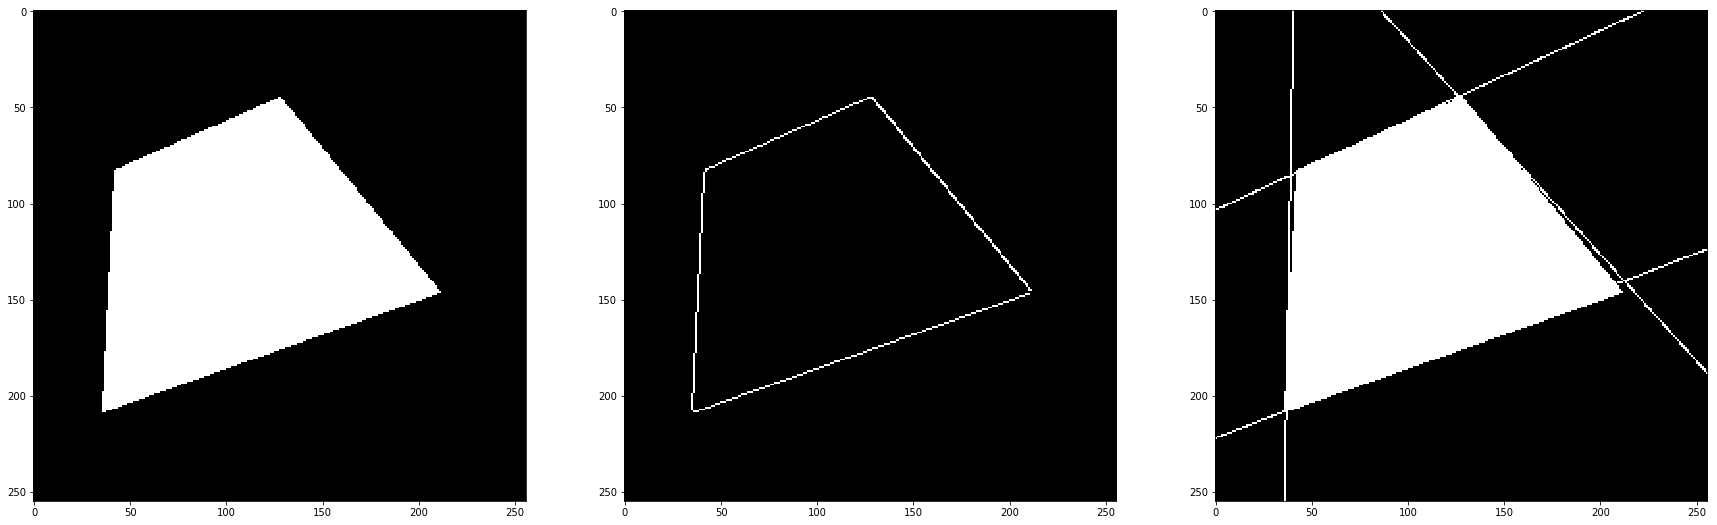

In [9]:
hough_transform('test.bmp')